You tube addview prediction 

In [275]:
# import data
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [276]:
data_train=pd.read_csv("train_lyst.csv")
data_train

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G


In [277]:
data_train.shape

(14999, 9)

In [278]:
# assigning each categary a number for category function
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [279]:
# removing character f in data 
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [280]:
#CONVERT VALUES TO NUMERIC 
data_train["adview"]=pd.to_numeric(data_train["adview"])
data_train["views"]=pd.to_numeric(data_train["views"])
data_train["likes"]=pd.to_numeric(data_train["likes"])
data_train["dislikes"]=pd.to_numeric(data_train["dislikes"])
data_train["comment"]=pd.to_numeric(data_train["comment"])


In [281]:
column_vidid=data_train['vidid']

In [282]:
# encoding features likes vidid duration category
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [283]:
# convert time in sec for duration 
import datetime
import time
def checki(x):
    y=x[2:]
    h=''
    m=''
    s=''
    mm=''
    P=['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=='H'):
                h=mm
                mm=''
            elif(i=='M'):
                m=mm
                mm=''
            else:
                s=mm
                mm=''
    if(h==''):
        h="00"
    elif(m==''):
        m='00'
    else:
        s='00'
    bp = h+':'+m+':'+s
    return bp        
    trian=pd.read_csv('train_lyst.csv')['duration']
    time=train.apply(chechi)
    
    def func_sec(time_string):
        h,m,s=time_string.split(":")
        return int(h)*3600 + int(m)*60 + int(s)
    time1=time.apply(func_sec)    
    data_train['duration']=time1

In [284]:
data_train

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4
...,...,...,...,...,...,...,...,...,...
14994,9869,2,525949,1137,83,86,1683,2833,1
14995,11758,1,665673,3849,156,569,1838,2257,4
14996,13263,4,3479,16,1,1,1053,2210,2
14997,6736,1,963,0,0,0,222,1364,7


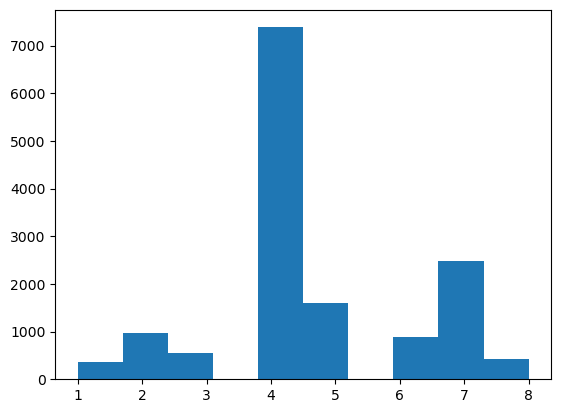

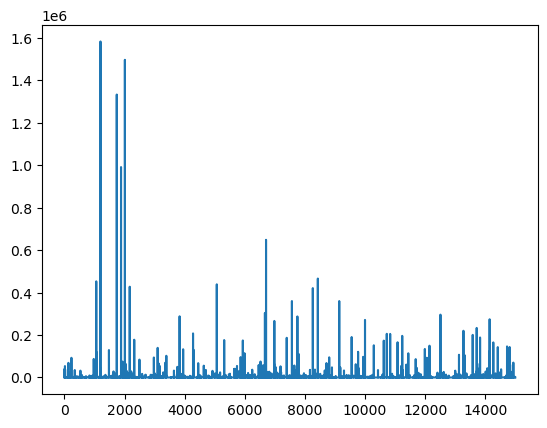

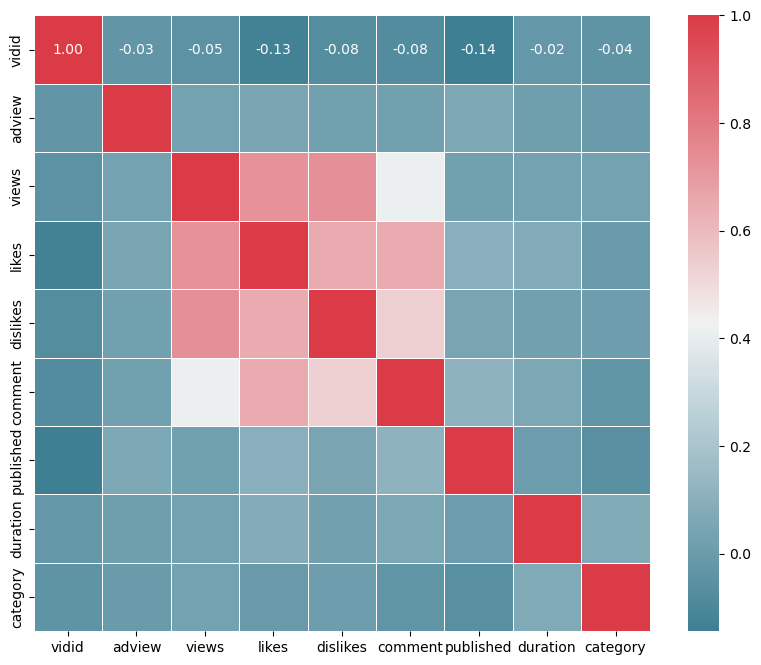

In [311]:
# visualisation 
 #individual plots
plt.hist(data_train['category'])
plt.show()  
plt.plot(data_train['adview'])
plt.show()  

#remove videos with adview more than 2000000 as outlier
data_train=data_train[data_train['adview']<2000000]

# heatmap
import seaborn as sns
f,ax=plt.subplots(figsize=(10,8))
corr=data_train.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=bool),cmap=sns.diverging_palette(220,10,as_cmap=True),fmt=".2f",linewidths=.5,
            square=True,ax=ax,annot=True)
plt.show()